# Census Income Report

## Data Description

The census income data was extracted from the 1994 census bureau database by Ronny Kohavi and Barry Becker.  A set of clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). Here we need to  predict whether a person makes over $50K a year. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_csv(r"census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### About Columns

1) Age: [continuous] Age of worker

2) Workclass: [Nominal] Working class of individual

3) Fnlwgt: [continuous] The Current Population Survey(CPS) detarmines the demographic charecteristic and employment status of individuals of working age. The weights on CPS files are estimated using 3 sets of controls and collecting through these weights 6 times.

4) Education: Education level of individual

5) Eduation_num: [continuous]

6) Marital_status: [nominal] 

7) Occupation: [nominal] type of occupation

8) Relationship: [nominal]

9) Race: [nominal] race to which individual belongs

10) Sex: [nominal] Sex of individual

11) Capital_gain: [continuous]

12) Capital_loss: [continuous]

13) Hours_per_week: [continuous] number of hours per week individual gives

14) Native_country: [nominal] to which country belongs

15) Income: Target variable

## EDA

In [4]:
df.shape

(32560, 15)

number of rows= 32560

number of columns= 15

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(32536, 15)

There was duplicate data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
Age               32536 non-null int64
Workclass         32536 non-null object
Fnlwgt            32536 non-null int64
Education         32536 non-null object
Education_num     32536 non-null int64
Marital_status    32536 non-null object
Occupation        32536 non-null object
Relationship      32536 non-null object
Race              32536 non-null object
Sex               32536 non-null object
Capital_gain      32536 non-null int64
Capital_loss      32536 non-null int64
Hours_per_week    32536 non-null int64
Native_country    32536 non-null object
Income            32536 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We don't have missing values to deal with in this set.

### Univariate Analysis

#### Attributes in Workclass

In [9]:
df.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

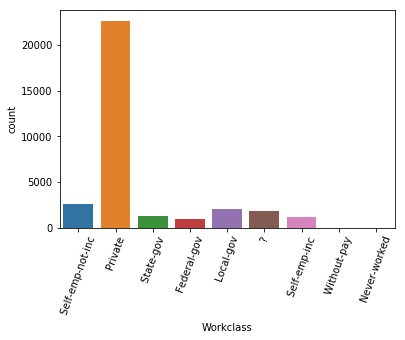

In [10]:
sns.countplot(x="Workclass",data=df)
plt.xticks(rotation=70)

#### Attributes in Education

In [11]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

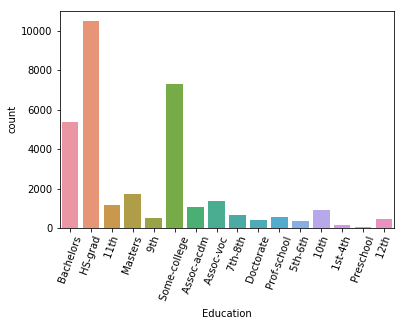

In [12]:
sns.countplot(x="Education",data=df)
plt.xticks(rotation=70)

#### Attributes in Marital Status

In [13]:
df.Marital_status.unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

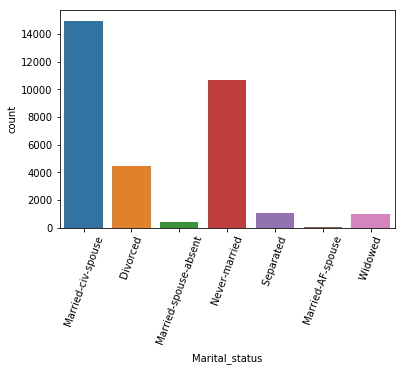

In [14]:
sns.countplot(x="Marital_status",data=df)
plt.xticks(rotation=70)

#### Attributes in Occupation

In [15]:
df.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

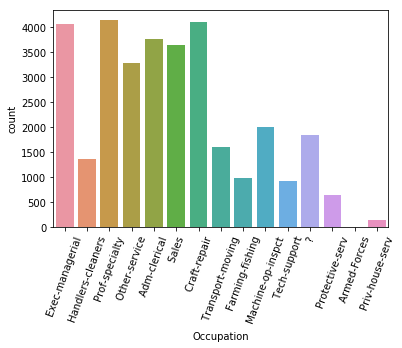

In [16]:
sns.countplot(x="Occupation",data=df)
plt.xticks(rotation=70)

#### Attributes in Relationship

In [17]:
df.Relationship.unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

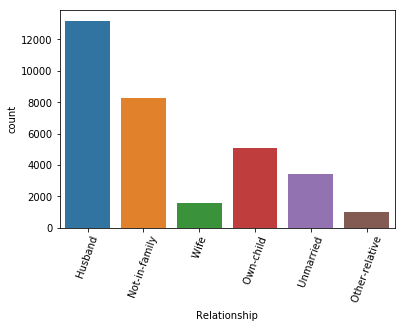

In [18]:
sns.countplot(x="Relationship",data=df)
plt.xticks(rotation=70)

#### Attributes in Race

In [19]:
df.Race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

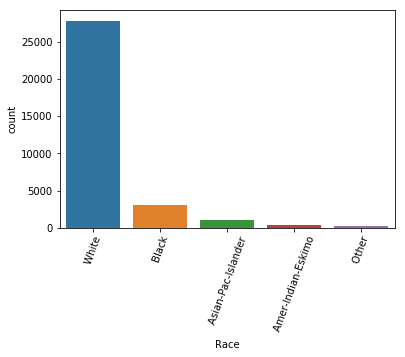

In [20]:
sns.countplot(x="Race",data=df)
plt.xticks(rotation=70)

#### Attributes in Sex

In [21]:
df.Sex.unique()

array([' Male', ' Female'], dtype=object)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

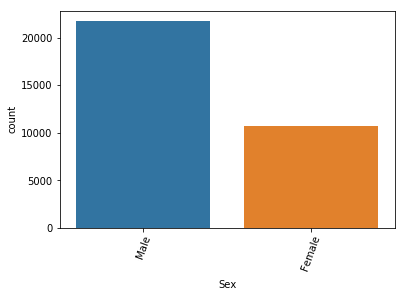

In [22]:
sns.countplot(x="Sex",data=df)
plt.xticks(rotation=70)

#### Attributes in Native Country

In [23]:
df.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

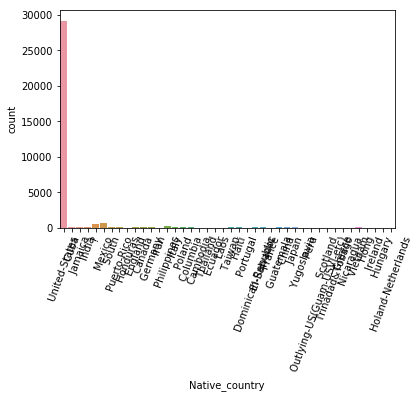

In [24]:
sns.countplot(x="Native_country",data=df)
plt.xticks(rotation=70)

In [25]:
df["Native_country"].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        62
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Since it's Census data of United state we observe a majority of people who are natives of united states

#### Checking for balanced data in target variable

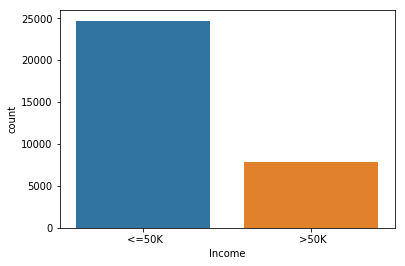

In [26]:
sns.countplot(x="Income",data=df)

We observe our data set is imbalanced

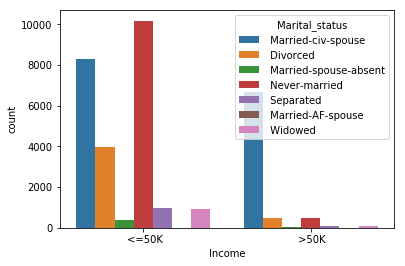

In [27]:
sns.countplot(df["Income"],hue=df["Marital_status"])   
plt.show()

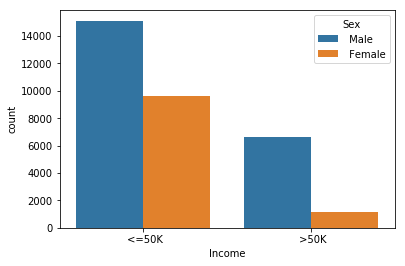

In [28]:
sns.countplot(df["Income"],hue=df["Sex"])   
plt.show()

Inorder to move to bivariate analysis we first need to encode our data

### Description of Data

In [29]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We observe mean, standard deviation, minimun, maximum and quatiles of the data.

#### Age

mean= 38.5855 , std = 13.638 , min = 17 , max = 90

#### Fnlwgt
mean= 189784.3 , std = 105556.3 , min = 12285 , max = 148470.5

#### Education_num
mean= 10.0817 , std = 2.5716 , min = 1 , max = 16

#### Capital_gain
meam= 1078.41 , std = 0 , min = 0 , max = 99999

#### Capital_loss
mean= 87.379 , std = 403.107 , min = 0 , max = 4356

#### Hours_per_week
mean= 40.4403 , std = 12.347 , min = 1 , max = 99

In [30]:
obj_lst=["Income","Native_country","Sex","Race","Relationship","Occupation","Marital_status","Education","Workclass"]
lab_enc= LabelEncoder()
for i in obj_lst:
    df1= lab_enc.fit_transform(df[i])
    df[i]=df1
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


### check for correlation

In [31]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003781,-0.076448,-0.010551,0.036224,-0.266142,-0.020911,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.001524,0.234039
Workclass,0.003781,1.000000,-0.016532,0.023480,0.052099,-0.064828,0.255105,-0.090421,0.049717,0.095960,0.033845,0.012255,0.139059,-0.007697,0.051706
Fnlwgt,-0.076448,-0.016532,1.000000,-0.028065,-0.043353,0.028154,0.001360,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.051866,-0.009521
Education,-0.010551,0.023480,-0.028065,1.000000,0.359105,-0.038413,-0.021249,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.063874,0.079361
Education_num,0.036224,0.052099,-0.043353,0.359105,1.000000,-0.069196,0.109804,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.050127,0.335299
Marital_status,-0.266142,-0.064828,0.028154,-0.038413,-0.069196,1.000000,-0.009778,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.023414,-0.199187
Occupation,-0.020911,0.255105,0.001360,-0.021249,0.109804,-0.009778,1.000000,-0.075600,0.006811,0.080532,0.025513,0.017977,0.080502,-0.012394,0.075398
Relationship,-0.263744,-0.090421,0.008859,-0.011060,-0.094424,0.185542,-0.075600,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.005634,-0.250955
Race,0.029116,0.049717,-0.021484,0.014307,0.031998,-0.067942,0.006811,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.137847,0.071855
Sex,0.088708,0.095960,0.027113,-0.027426,0.012181,-0.129425,0.080532,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.008262,0.215984


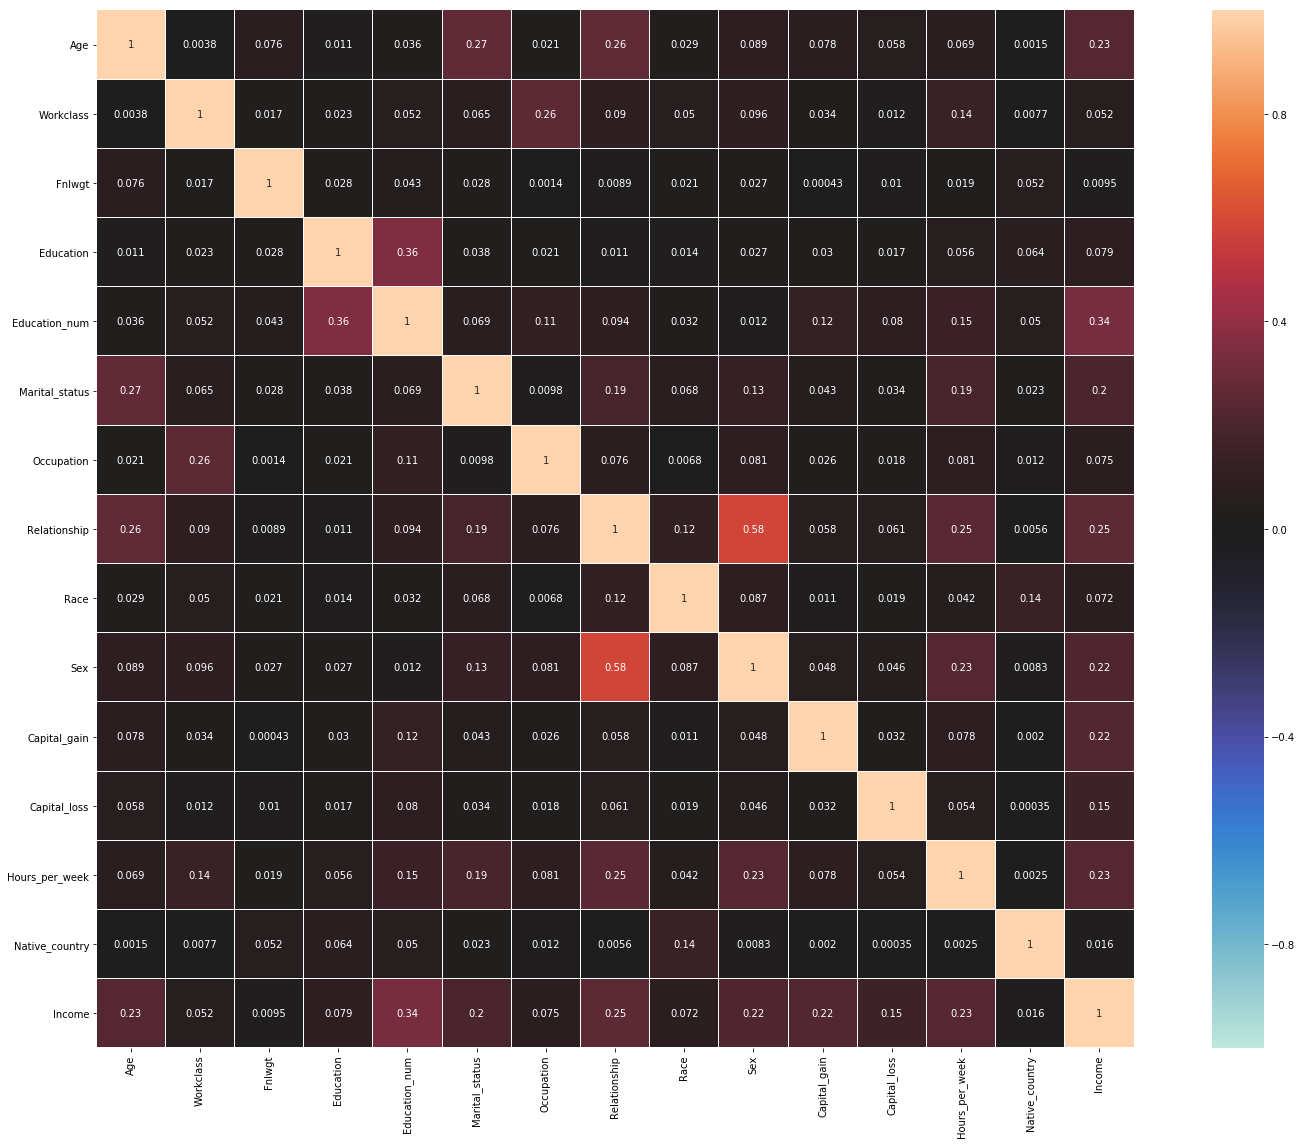

In [32]:
## HeatMap
df_corr= df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

We don't obseve any multicollinearity in data. Also Income is both ositively and negatively correlated with features.

In [33]:
corr_mat=df.corr()
corr_mat["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335299
Age               0.234039
Hours_per_week    0.229659
Capital_gain      0.223340
Sex               0.215984
Capital_loss      0.150498
Education         0.079361
Occupation        0.075398
Race              0.071855
Workclass         0.051706
Native_country    0.015623
Fnlwgt           -0.009521
Marital_status   -0.199187
Relationship     -0.250955
Name: Income, dtype: float64

Max Correlatiomn: Education_num

Min correlation: Fnlwgt

### Check for outliers

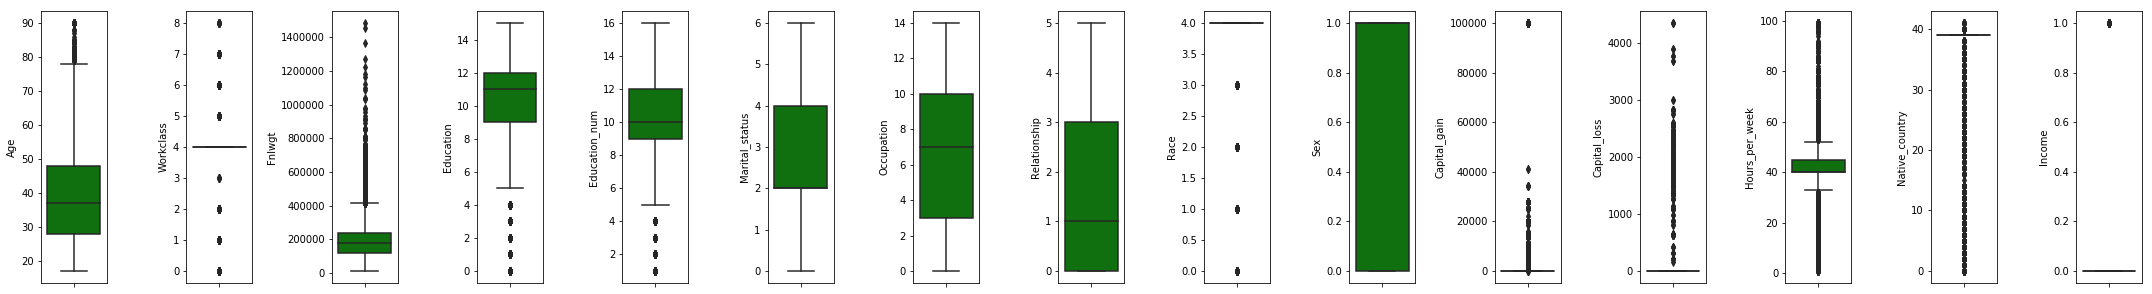

In [34]:
collist=df.columns.values
plt.figure(figsize=(30,40))
for i in range(0,len(collist)):
    plt.subplot(10,15,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

We observe outliers in following continuous variables fnlwgt, Education_num, capital_gain, capital_loss and hours_per_week

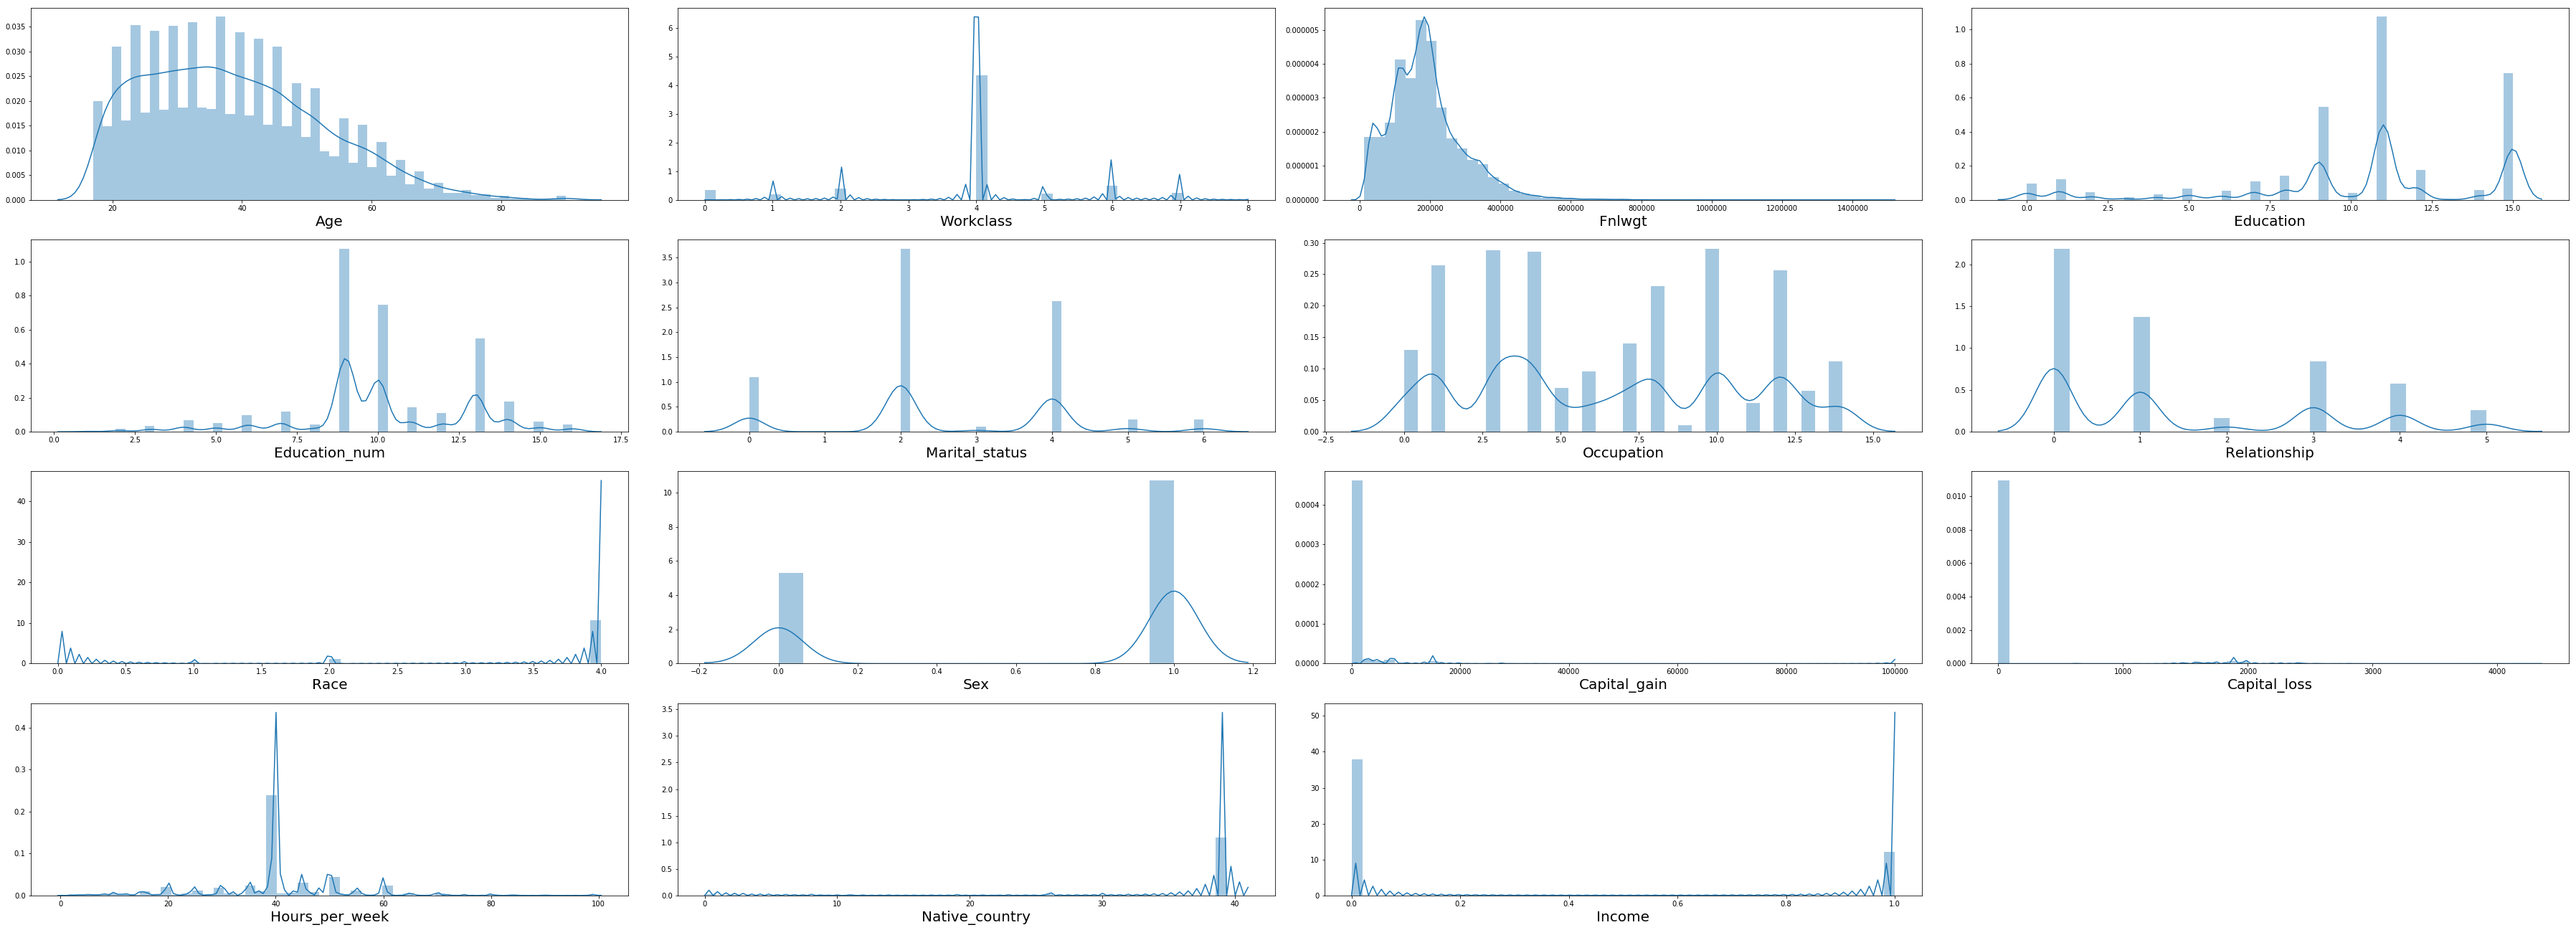

In [35]:
## checking for Normal Distribution of curve
plt.figure(figsize=(50,40),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

we observe skewness in continuous data as well and hence no plot observed is normally distributed

## Data Cleaning

fnlwgt has too many outliers and is least correlated and hence we can drop it

In [36]:
df=df.drop(columns=["Fnlwgt"],axis=1)

In [37]:
z=np.abs(stats.zscore(df))
index=(np.where(z>4)[0])
df_new=df.drop(df.index[index])
df_new.shape

(29908, 14)

In [38]:
print("Percentage of data loss=",((32536-29908)/32536)*100)

Percentage of data loss= 8.07720678632899


We will now proceed to check skewness of data

In [39]:
x=df_new.drop(columns=["Income"],axis=1)
y=df_new["Income"]

### Check for skewness

In [40]:
x.skew()

Age               0.571862
Workclass        -0.752548
Education        -0.931979
Education_num    -0.318561
Marital_status   -0.041717
Occupation        0.125647
Relationship      0.751977
Race             -2.406328
Sex              -0.685441
Capital_gain      5.494822
Capital_loss      9.143774
Hours_per_week   -0.152343
Native_country   -4.477136
dtype: float64

We observe skewness therefore we will use power transform to remove it

In [41]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

#### Balancing our data

In [42]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [43]:
y_over.value_counts()

1    23216
0    23216
Name: Income, dtype: int64

In [44]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x_over)

## Model Building

#### Finding Best random state

In [45]:
lr=LogisticRegression()
for i in range(0,500):
    x_train, x_test, y_train, y_test= train_test_split(x_scaled, y_over , test_size=0.25, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    score_lr=accuracy_score(y_test,pred_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("Best random state is ",i)
        print("Training Score ",accuracy_score(y_train,pred_train)*100)
        print("Testing Score ",accuracy_score(y_test,pred_test)*100)
        break;

Best random state is  1
Training Score  77.66770043648059
Testing Score  77.69641626464508


In [59]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y_over , test_size=0.25, random_state=1)

#### LogisticRegression

In [47]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
score_lr=accuracy_score(y_test,y_pred)
print("Logistic Regression model Score =",accuracy_score(y_test,y_pred))

Logistic Regression model Score = 0.774552033080634


#### KNN Model

In [48]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
score_knn=accuracy_score(y_test,y_pred)
print("knn model Score =",accuracy_score(y_test,y_pred))

knn model Score = 0.8475189524465886


#### Decision Tree

In [49]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
score_dt=accuracy_score(y_test,y_pred)
print("Decision Tree model Score =",accuracy_score(y_test,y_pred))

Decision Tree model Score = 0.8542384562370778


#### Support Vector Classifier

In [50]:
svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
score_svc=accuracy_score(y_test,y_pred)
print("SVM model Score =",accuracy_score(y_test,y_pred))

SVM model Score = 0.8299448656099242


#### Using cross_val score to check for best model

In [51]:
cross_val_score(lr, x_scaled, y_over, cv=5)
cvs_lr=cross_val_score(LogisticRegression(), x_scaled, y_over, cv=5).mean()
print("Logistic Regression Cross Validation score= ",cvs_lr)

Logistic Regression Cross Validation score=  0.7764259549979904


In [52]:
cvs_knn=cross_val_score(knn, x_scaled, y_over, cv=5).mean()
print("KNeighborsClassifier Cross Validation score= ",cvs_knn)

KNeighborsClassifier Cross Validation score=  0.8503408141566258


In [53]:
cross_val_score(dt, x_scaled, y_over, cv=5)
cvs_dt=cross_val_score(DecisionTreeClassifier(), x_scaled, y_over, cv=5).mean()
print("DecisionTree Classifier Cross Validation score= ",cvs_dt)

DecisionTree Classifier Cross Validation score=  0.8518069661270282


In [54]:
cross_val_score(svc, x_scaled, y_over, cv=5)
cvs_svm=cross_val_score(SVC(), x_scaled, y_over, cv=5).mean()
print("SVC Cross Validation score= ",cvs_svm)

SVC Cross Validation score=  0.8263700719819814


We will now check for difference between accuracy score and cross validation score

In [55]:
print("Logistic Regression: ",(score_lr-cvs_lr))

Logistic Regression:  -0.0018739219173563582


In [56]:
print("KNN Model: ",(score_knn-cvs_knn))

KNN Model:  -0.002821861710037177


In [57]:
print("Decision Tree: ",(score_dt-cvs_dt))

Decision Tree:  0.0024314901100496167


In [58]:
print("SVM: ",(score_svc-cvs_svm))

SVM:  0.003574793627942774


From the differences we observe logistic regression model as our best model and hence we will now movw forward to tune our model. But before that we will plot ROC currve and determine ROC AUC score

### ROC AUC Curve

In [60]:
print("ROC_AUC_Score for decisiontreeClassifier= ",roc_auc_score(y_test,dt.predict(x_test)))

print("ROC_AUC_Score for Logistic Regression= ",roc_auc_score(y_test,lr.predict(x_test)))

print("ROC_AUC_Score for KNeighboursClassifier= ",roc_auc_score(y_test,knn.predict(x_test)))

print("ROC_AUC_Score for SVM= ",roc_auc_score(y_test,svc.predict(x_test)))

ROC_AUC_Score for decisiontreeClassifier=  0.9579594326080707
ROC_AUC_Score for Logistic Regression=  0.7777432534747315
ROC_AUC_Score for KNeighboursClassifier=  0.8820744950152755
ROC_AUC_Score for SVM=  0.829612768233129


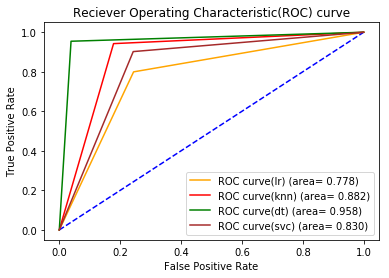

In [61]:
fpr, tpr, threshold= roc_curve(y_test,lr.predict(x_test))
plt.plot(fpr,tpr,color='orange',label='ROC curve(lr) (area= %0.3f)'%(roc_auc_score(y_test,lr.predict(x_test))))
plt.plot([0,1],[0,1], color='blue', linestyle='--')

fpr, tpr, threshold= roc_curve(y_test,knn.predict(x_test))
plt.plot(fpr,tpr,color='red', label='ROC curve(knn) (area= %0.3f)'%(roc_auc_score(y_test,knn.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,dt.predict(x_test))
plt.plot(fpr,tpr,color='green', label='ROC curve(dt) (area= %0.3f)'%(roc_auc_score(y_test,dt.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,svc.predict(x_test))
plt.plot(fpr,tpr,color='brown', label='ROC curve(svc) (area= %0.3f)'%(roc_auc_score(y_test,svc.predict(x_test))))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic(ROC) curve')
plt.legend(loc='lower right')
plt.show() 

### Hyper Parametric Tuning

In [66]:
lr= LogisticRegression()
param={"tol":[0.0001,0.0011,0.0021],"penalty":["l1","l2","elasticnet","none"],
       "max_iter":[100,200],"multi_class":["ovr","multinomial"]}
grid_search=GridSearchCV(estimator=lr, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
print(best_parameter)

{'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'tol': 0.0001}


In [67]:
clf=LogisticRegression(tol=0.001,max_iter=100,multi_class="ovr",penalty="l2")
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.7769641626464507

In [69]:
cfm =confusion_matrix(y_test,y_pred)
print("Accuracy Score :",clf.score(x_test,y_test))
print("Confusion Matrix :\n",cfm,"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))
print("\n ROC_AUC_Score for Logistic Regression= ",roc_auc_score(y_test,clf.predict(x_test)))

Accuracy Score : 0.7769641626464507
Confusion Matrix :
 [[2493 3312]
 [2414 3389]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.43      0.47      5805
           1       0.51      0.58      0.54      5803

    accuracy                           0.51     11608
   macro avg       0.51      0.51      0.50     11608
weighted avg       0.51      0.51      0.50     11608


 ROC_AUC_Score for Logistic Regression=  0.7769679409340531


### Saving Model

In [70]:
filename= "CensusIncome.pickle"
pickle.dump(clf,open(filename,'wb'))